In [ ]:
import pandas as pd

In [ ]:
covid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid_19_indonesia_time_series_all.csv') # memuat file csv sebagai data frame
covid_df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [ ]:
covid_df.drop(columns='Date', inplace=True) # menghapus kolom bernama 'Id'
covid_df.head() # tampilkan 5 baris pertama

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [ ]:
covid_df.Island # bentuk/dimensi dataset (baris,kolom)

0            Jawa
1            Jawa
2             NaN
3        Sumatera
4            Jawa
           ...   
21754    Sulawesi
21755    Sumatera
21756    Sumatera
21757    Sumatera
21758         NaN
Name: Island, Length: 21759, dtype: object

In [ ]:
covid_df.columns # daftar nama kolom

Index(['Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [ ]:
covid_df.dtypes # tipe data untuk tiap kolom

Location ISO Code               object
Location                        object
New Cases                        int64
New Deaths                       int64
New Recovered                    int64
New Active Cases                 int64
Total Cases                      int64
Total Deaths                     int64
Total Recovered                  int64
Total Active Cases               int64
Location Level                  object
City or Regency                float64
Province                        object
Country                         object
Continent                       object
Island                          object
Time Zone                       object
Special Status                  object
Total Regencies                  int64
Total Cities                   float64
Total Districts                  int64
Total Urban Villages           float64
Total Rural Villages           float64
Area (km2)                       int64
Population                       int64
Population Density       

In [ ]:
# iris_df.isnull().values.any()
covid_df.isna().values.any() # mendeteksi keberadaan nilai kosong

True

In [ ]:
# iris_df[iris_df.duplicated(keep=False)] # tampilkan seluruh baris dengan duplikasi
covid_df[covid_df.duplicated()] # tampilkan hanya baris duplikasi sekunder

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
13,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.0,0.01,0.0,0.00,0.00,0.00%,0.00%,1.0,1.0
15,ID-RI,Riau,0,0,0,0,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.0,0.33,0.0,0.00,0.00,0.00%,150.00%,1.0,1.0
20,ID-RI,Riau,0,0,0,0,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.0,0.33,0.0,0.00,0.00,0.00%,150.00%,1.0,1.0
25,ID-RI,Riau,0,0,0,0,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.0,0.33,0.0,0.00,0.00,0.00%,150.00%,1.0,1.0
31,ID-RI,Riau,0,0,0,0,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.0,0.33,0.0,0.00,0.00,0.00%,150.00%,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,ID-BE,Bengkulu,0,0,0,0,23103,473,22612,18,Province,NaN,Bengkulu,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,0.0,11554.16,0.0,236.55,23.66,2.05%,97.87%,1.0,1.0
21626,ID-SG,Sulawesi Tenggara,0,0,0,0,20157,527,19582,48,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,0.0,7648.38,0.0,199.97,20.00,2.61%,97.15%,1.0,1.0
21634,ID-BE,Bengkulu,0,0,0,0,23103,473,22612,18,Province,NaN,Bengkulu,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,0.0,11554.16,0.0,236.55,23.66,2.05%,97.87%,1.0,1.0
21659,ID-SG,Sulawesi Tenggara,0,0,0,0,20157,527,19582,48,Province,NaN,Sulawesi Tenggara,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,15,2.0,219,377.0,1911.0,38068,2635461,69.23,122.070311,-4.124689,0.0,7648.38,0.0,199.97,20.00,2.61%,97.15%,1.0,1.0


In [ ]:
covid_df.duplicated().value_counts() # hitung jumlah duplikasi data

False    21337
True       422
dtype: int64

In [ ]:
covid_df.drop_duplicates(inplace=True) # menghapus duplikasi data
covid_df.shape

(21337, 37)

In [ ]:
covid_df.describe() # deskripsi data

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,21337.000000,21337.000000,21337.000000,21337.000000,2.133700e+04,21337.000000,2.133700e+04,21337.000000,0.0,21337.000000,20742.000000,21337.000000,20752.000000,20695.000000,2.133700e+04,2.133700e+04,21337.000000,21337.000000,21337.000000,21337.000000,21337.000000,21337.000000,21337.000000,21337.000000,20150.000000,18870.000000
mean,399.032526,13.481886,384.773398,0.777241,8.690659e+04,2699.885176,7.819755e+04,6009.152224,NaN,24.377748,5.941471,424.671182,514.378951,4535.622373,1.121505e+05,1.569817e+07,757.602431,113.653336,-2.744923,29.974364,6288.125750,0.869592,166.397248,16.639694,1.403958,1.075803
std,2094.229439,77.212455,2018.023941,946.436590,3.719509e+05,11886.109893,3.435793e+05,27776.795465,NaN,69.306469,16.608393,1209.359100,1440.632299,12759.391682,3.230906e+05,4.521106e+07,2768.641259,9.808214,3.606173,70.505909,10353.374695,2.296530,255.669723,25.566993,3.111758,1.596017
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,NaN,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,5.000000,-17.000000,2.115000e+03,60.000000,1.248000e+03,203.000000,NaN,7.000000,1.000000,103.000000,99.000000,928.000000,1.678700e+04,1.999539e+06,47.790000,106.109004,-6.204699,2.010000,486.310000,0.000000,13.090000,1.310000,0.640000,0.630000
50%,43.000000,1.000000,33.000000,1.000000,1.124300e+04,301.000000,9.109000e+03,962.000000,NaN,11.000000,2.000000,169.000000,175.000000,1591.000000,4.201300e+04,4.216171e+06,103.840000,113.417654,-2.461746,8.540000,2861.260000,0.190000,75.470000,7.550000,0.980000,1.000000
75%,156.000000,5.000000,148.000000,27.000000,3.781500e+04,1062.000000,3.355600e+04,2660.000000,NaN,18.000000,4.000000,289.000000,332.000000,2853.000000,7.546800e+04,9.095591e+06,262.700000,121.201093,0.212037,26.830000,7500.350000,0.760000,199.210000,19.920000,1.340000,1.000000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,NaN,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,175.000000,134.500000


In [ ]:
covid_df.corr() # korelasi antar kolom

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
New Cases,1.000000,0.883532,0.896183,0.229800,0.558046,0.488000,0.510422,0.950242,NaN,0.524047,0.531615,0.527694,0.529207,0.541784,0.510586,0.534903,0.085658,-0.033992,-0.010519,0.258485,0.097591,0.192988,0.085569,0.085570,-0.015320,0.012652
New Deaths,0.883532,1.000000,0.937649,-0.125831,0.591113,0.552513,0.546335,0.921212,NaN,0.485704,0.489072,0.489184,0.489678,0.493219,0.468917,0.497524,0.025911,-0.027588,-0.017411,0.160008,0.076751,0.250755,0.107282,0.107282,-0.018664,0.046160
New Recovered,0.896183,0.937649,1.000000,-0.225699,0.630624,0.569174,0.586776,0.942944,NaN,0.524260,0.531995,0.527904,0.529481,0.545686,0.510938,0.535071,0.087876,-0.034267,-0.010207,0.221689,0.124286,0.217015,0.116640,0.116640,-0.020342,0.032651
New Active Cases,0.229800,-0.125831,-0.225699,1.000000,-0.158045,-0.178865,-0.166275,0.016918,NaN,0.002115,0.002091,0.002132,0.002095,0.002225,0.002106,0.002121,0.000053,0.000098,-0.000093,0.086217,-0.055324,-0.056150,-0.068112,-0.068111,0.010986,-0.045347
Total Cases,0.558046,0.591113,0.630624,-0.158045,1.000000,0.976580,0.998136,0.626582,NaN,0.643757,0.653786,0.648178,0.650638,0.664798,0.627386,0.657220,0.119494,-0.040590,-0.014115,0.077033,0.243536,0.082587,0.251925,0.251923,-0.025110,0.008042
Total Deaths,0.488000,0.552513,0.569174,-0.178865,0.976580,1.000000,0.977495,0.558262,NaN,0.630046,0.635580,0.634595,0.635896,0.641080,0.608147,0.645743,0.049241,-0.035024,-0.025209,0.037332,0.174229,0.073739,0.249452,0.249451,-0.025022,0.007835
Total Recovered,0.510422,0.546335,0.586776,-0.166275,0.998136,0.977495,1.000000,0.578164,NaN,0.626382,0.636661,0.630668,0.633348,0.648358,0.610526,0.639645,0.123957,-0.040777,-0.014035,0.066558,0.251138,0.072369,0.257712,0.257710,-0.024469,0.007153
Total Active Cases,0.950242,0.921212,0.942944,0.016918,0.626582,0.558262,0.578164,1.000000,NaN,0.602854,0.607285,0.607092,0.606086,0.612791,0.589132,0.612361,0.045781,-0.024157,-0.004620,0.192279,0.080162,0.179190,0.078993,0.078993,-0.022846,0.015836
City or Regency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Regencies,0.524047,0.485704,0.524260,0.002115,0.643757,0.630046,0.626382,0.602854,NaN,1.000000,0.991579,0.998176,0.994320,0.996480,0.985618,0.980665,-0.065099,0.013183,0.074737,-0.031300,-0.040261,-0.011783,-0.013764,-0.013764,-0.022040,0.004639


In [ ]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

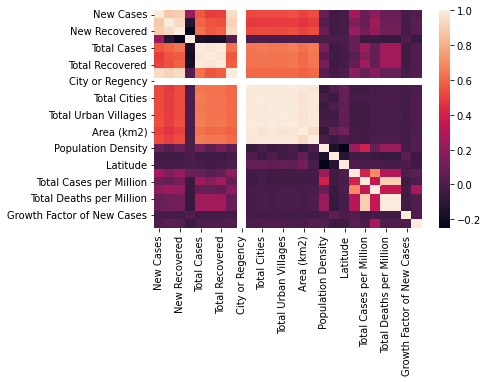

In [ ]:
sns.heatmap(data=covid_df.corr())

In [ ]:
covid_df['Location'].value_counts() # menghitung jumlah setiap species

DKI Jakarta                   642
Indonesia                     641
Jawa Barat                    638
Banten                        637
Jawa Tengah                   635
Daerah Istimewa Yogyakarta    626
Jawa Timur                    625
Sulawesi Selatan              623
Kalimantan Timur              621
Bali                          620
Sumatera Utara                619
Riau                          617
Sumatera Selatan              616
Kalimantan Tengah             616
Kepulauan Riau                615
Lampung                       614
Sumatera Barat                612
Kalimantan Selatan            611
Sulawesi Tengah               610
Nusa Tenggara Barat           610
Sulawesi Tenggara             610
Sulawesi Utara                608
Papua                         603
Kalimantan Barat              603
Kalimantan Utara              601
Kepulauan Bangka Belitung     598
Maluku                        597
Papua Barat                   597
Sulawesi Barat                595
Maluku Utara  

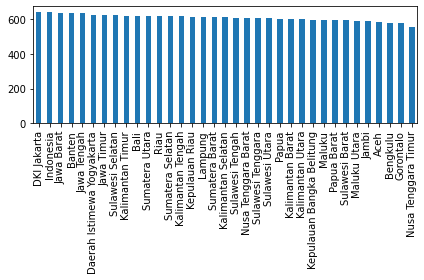

In [ ]:
covid_df['Location'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

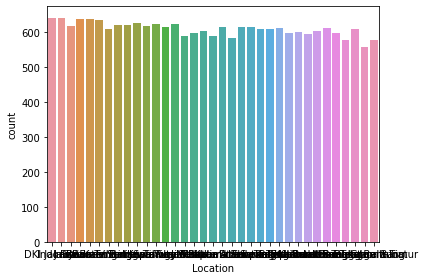

In [ ]:
sns.countplot(data=covid_df, x='Location')
plt.tight_layout()
# sns.countplot?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


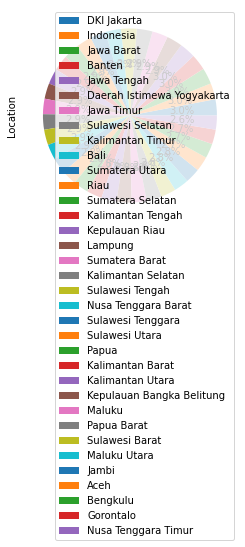

In [ ]:
covid_df['Location'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

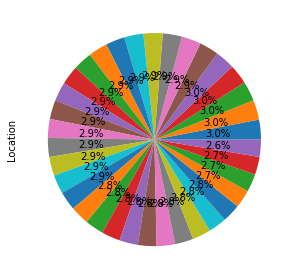

In [ ]:
covid_df['Location'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=False)
plt.tight_layout()

Text(0.5, 1.0, 'Longitude')

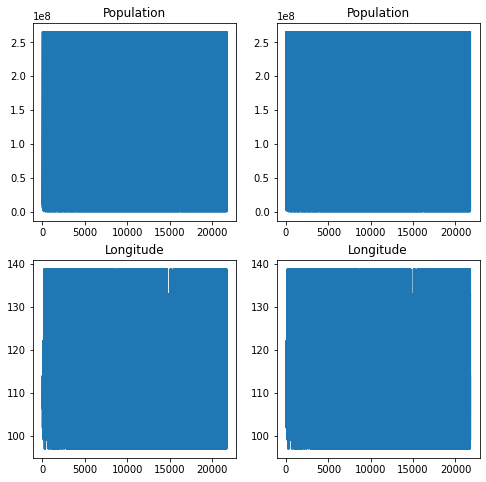

In [ ]:


fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

covid_df['Population'].plot.line(ax=ax[0][0])
ax[0][0].set_title('Population')

covid_df['Population'].plot.line(ax=ax[0][1])
ax[0][1].set_title('Population')

covid_df.Longitude.plot.line(ax=ax[1][0])
ax[1][0].set_title('Longitude')

covid_df.Longitude.plot.line(ax=ax[1][1])
ax[1][1].set_title('Longitude')



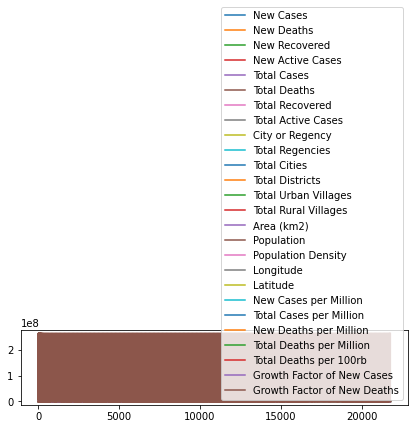

In [ ]:
covid_df.plot()
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


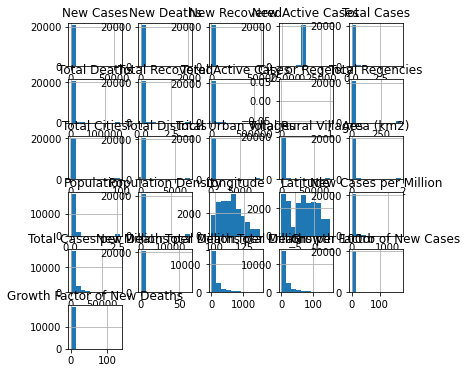

In [ ]:
covid_df.hist(figsize=(6,6), bins=10)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


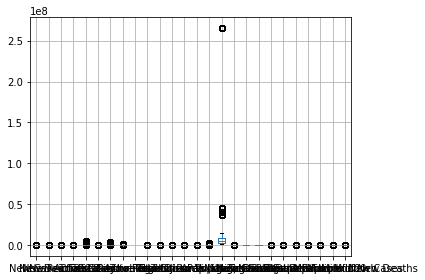

In [ ]:
covid_df.boxplot()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

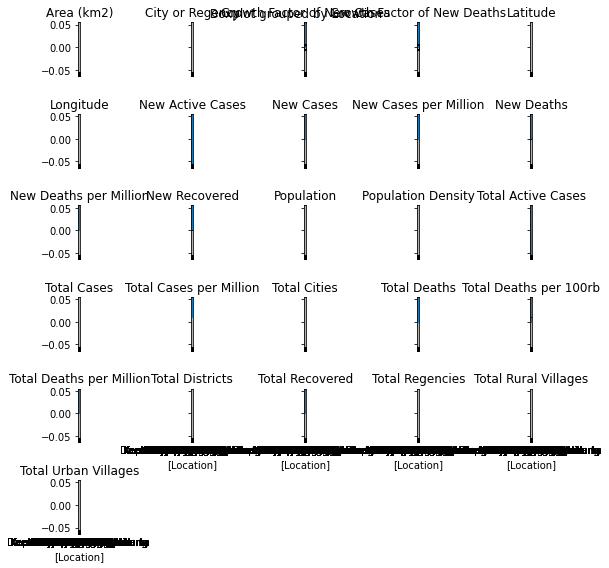

In [ ]:
covid_df.boxplot(by="Location", figsize=(8,8))
plt.tight_layout()

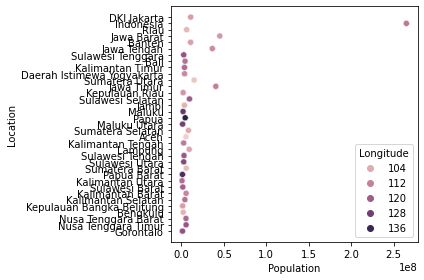

In [ ]:
sns.scatterplot(x='Population', y='Location', data=covid_df, hue='Longitude')
plt.tight_layout()

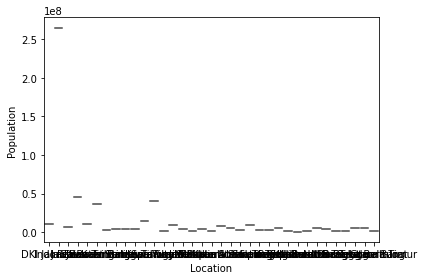

In [ ]:
sns.violinplot(data=covid_df, y='Population', x='Location', inner='quartile')
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

In [ ]:
X = covid_df.drop(columns='Population') # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,-22,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,ID-RI,Riau,1,0,0,1,2,0,3,-1,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [ ]:
y = covid_df['Population'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0     10846145
1     10846145
2    265185520
3      6074100
4     10846145
Name: Population, dtype: int64

In [ ]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)


training dataset
(12802, 36)
(12802,)

testing dataset:
(8535, 36)
(8535,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier